In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nameparser import HumanName
%matplotlib inline

killings = pd.read_csv('./csv_files/police_killings_original.csv')

In [167]:
killings.shape

(7642, 23)

In [4]:
killings.dropna(how='all', inplace=True)
killings.dropna(how='all', axis=1, inplace=True)
killings.shape

(7663, 27)

In [5]:
(killings.isnull().sum() / len(killings)) * 100

Victim's name                                                                                                                                                                  0.000000
Victim's age                                                                                                                                                                   0.874331
Victim's gender                                                                                                                                                                0.104398
Victim's race                                                                                                                                                                  0.000000
URL of image of victim                                                                                                                                                        45.191178
Date of Incident (month/day/year)                                               

In [6]:
killings.drop(['Alleged Threat Level (Source: WaPo)', 
               'Fleeing (Source: WaPo)', 
               'Body Camera (Source: WaPo)', 
               'WaPo ID (If included in WaPo database)',
              'Off-Duty Killing?',
              'ID'], axis=1, inplace=True)

In [7]:
killings.columns

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed',
       'Alleged Weapon (Source: WaPo)',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'],
      dtype='object')

In [8]:
killings.rename(columns={
    "Victim's name":"Victims Name", 
    "Victim's age":"Victims Age", 
    "Victim's gender":"Victims Gender", 
    "Victim's race":"Victims Race", 
    "Date of Incident (month/day/year)":"Date", 
    "A brief description of the circumstances surrounding the death":"Description of Circumstances",
    "Official disposition of death (justified or other)":"Official Disposition of Death",
    "Criminal Charges?":"Criminal Charges", 
    'Link to news article or photo of official document':"News Article Link",
    'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )':'Geography Type',
    'Alleged Weapon (Source: WaPo)':'Alleged Weapon'}, inplace=True)

In [9]:
killings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7663 entries, 0 to 7662
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Victims Name                   7663 non-null   object 
 1   Victims Age                    7596 non-null   object 
 2   Victims Gender                 7655 non-null   object 
 3   Victims Race                   7663 non-null   object 
 4   URL of image of victim         4200 non-null   object 
 5   Date                           7663 non-null   object 
 6   Street Address of Incident     7580 non-null   object 
 7   City                           7657 non-null   object 
 8   State                          7663 non-null   object 
 9   Zipcode                        7624 non-null   float64
 10  County                         7648 non-null   object 
 11  Agency responsible for death   7647 non-null   object 
 12  Cause of death                 7663 non-null   o

In [10]:
killings["Date"] = pd.to_datetime(killings["Date"], infer_datetime_format=True)

In [11]:
killings.isnull().sum()

Victims Name                        0
Victims Age                        67
Victims Gender                      8
Victims Race                        0
URL of image of victim           3463
Date                                0
Street Address of Incident         83
City                                6
State                               0
Zipcode                            39
County                             15
Agency responsible for death       16
Cause of death                      0
Description of Circumstances       20
Official Disposition of Death     256
Criminal Charges                    0
News Article Link                  12
Symptoms of mental illness?        11
Unarmed                             0
Alleged Weapon                      0
Geography Type                     67
dtype: int64

In [12]:
(killings.isnull().sum() / len(killings)) * 100

Victims Name                      0.000000
Victims Age                       0.874331
Victims Gender                    0.104398
Victims Race                      0.000000
URL of image of victim           45.191178
Date                              0.000000
Street Address of Incident        1.083127
City                              0.078298
State                             0.000000
Zipcode                           0.508939
County                            0.195746
Agency responsible for death      0.208796
Cause of death                    0.000000
Description of Circumstances      0.260994
Official Disposition of Death     3.340728
Criminal Charges                  0.000000
News Article Link                 0.156597
Symptoms of mental illness?       0.143547
Unarmed                           0.000000
Alleged Weapon                    0.000000
Geography Type                    0.874331
dtype: float64

In [13]:
# null_image = killings[killings['URL of image of victim'].isnull() == True].index
# killings.loc[null_image,['URL of image of victim']] = 'None'
killings['URL of image of victim'].fillna('None', inplace=True)

In [14]:
killings.isnull().sum()

Victims Name                       0
Victims Age                       67
Victims Gender                     8
Victims Race                       0
URL of image of victim             0
Date                               0
Street Address of Incident        83
City                               6
State                              0
Zipcode                           39
County                            15
Agency responsible for death      16
Cause of death                     0
Description of Circumstances      20
Official Disposition of Death    256
Criminal Charges                   0
News Article Link                 12
Symptoms of mental illness?       11
Unarmed                            0
Alleged Weapon                     0
Geography Type                    67
dtype: int64

In [15]:
killings[killings["Victims Gender"].isnull()==True]

,Victims Name,Victims Age,Victims Gender,Victims Race,URL of image of victim,Date,Street Address of Incident,City,State,Zipcode,...,Agency responsible for death,Cause of death,Description of Circumstances,Official Disposition of Death,Criminal Charges,News Article Link,Symptoms of mental illness?,Unarmed,Alleged Weapon,Geography Type
13,Name withheld by police,NaN,NaN,Unknown race,None,2019-12-29,3015 Old State Rd 25,Lafayette,IN,47905.0,...,Tippecanoe County Sheriff’s Office,Gunshot,Two men who were shot and killed at a Family E...,Pending investigation,No known charges,https://www.jconline.com/story/news/2019/12/30...,No,Allegedly Armed,gun,Urban
112,Name withheld by police,NaN,NaN,White,None,2019-11-29,38300 Mountain Hwy E,Eatonville,WA,98328.0,...,Pierce County Sheriff's Office,Gunshot,A man was reportedly chased from a driveway. W...,Pending investigation,No known charges,https://katu.com/news/local/sheriff-suspect-ki...,No,Unclear,undetermined,Rural
528,Dennis Edwards,NaN,NaN,White,None,2019-07-10,NaN,Kansas City,KS,NaN,...,NaN,Gunshot,NaN,Pending investigation,No known charges,NaN,NaN,Allegedly Armed,gun,NaN
774,Akeen Brown,NaN,NaN,Black,None,2019-04-17,NaN,Flint,MI,NaN,...,NaN,Gunshot,NaN,Pending investigation,No known charges,NaN,NaN,Allegedly Armed,gun,NaN
806,Name withheld by police,NaN,NaN,Hispanic,None,2019-04-06,NM-9,Santa Teresa,NM,88021.0,...,U.S. Customs and Border Protection,Vehicle,"Robert Acevedo, 27, was charged with two count...",Criminal,No known charges,https://www.elpasotimes.com/story/news/immigra...,No,Vehicle,vehicle,Rural
807,Name withheld by police,NaN,NaN,Hispanic,None,2019-04-06,NM-9,Santa Teresa,NM,88021.0,...,U.S. Customs and Border Protection,Vehicle,"Robert Acevedo, 27, was charged with two count...",Criminal,No known charges,https://www.elpasotimes.com/story/news/immigra...,No,Vehicle,vehicle,Rural
1017,Name withheld by police,NaN,NaN,Native American,None,2019-01-23,US-491,Naschitti,NM,87325.0,...,Navajo Police Department,Gunshot,Navajo Nation Police confirmed that a police o...,Pending investigation,No known charges,https://navajotimes.com/reznews/police-confirm...,No,Unclear,undetermined,Rural
1029,Jihad Merrick,NaN,NaN,Unknown race,None,2019-01-16,NaN,Nashua,IA,NaN,...,"Bremer County Sheriff’s Office, Chickasaw Coun...",Gunshot,Officers then approached the vehicle and found...,Pending investigation,No known charges,https://wcfcourier.com/news/local/crime-and-co...,Yes,Vehicle,vehicle,NaN


In [16]:
killings[killings['Victims Name']=='Jihad Merrick']['News Article Link']

1029    https://wcfcourier.com/news/local/crime-and-co...
2184    https://kchanews.com/2018/01/18/iowa-dci-to-in...
Name: News Article Link, dtype: object

In [17]:
killings.drop(1029, inplace=True)

In [18]:
killings.loc[528, 'Victims Gender'] = 'Male'
killings.loc[774, 'Victims Gender'] = 'Male'

In [19]:
killings[killings["Victims Gender"].isnull()==True]['News Article Link']

13      https://www.jconline.com/story/news/2019/12/30...
112     https://katu.com/news/local/sheriff-suspect-ki...
806     https://www.elpasotimes.com/story/news/immigra...
807     https://www.elpasotimes.com/story/news/immigra...
1017    https://navajotimes.com/reznews/police-confirm...
Name: News Article Link, dtype: object

In [20]:
killings['Victims Gender'].fillna('Unknown', inplace=True)

In [21]:
killings.isnull().sum()

Victims Name                       0
Victims Age                       66
Victims Gender                     0
Victims Race                       0
URL of image of victim             0
Date                               0
Street Address of Incident        82
City                               6
State                              0
Zipcode                           38
County                            15
Agency responsible for death      16
Cause of death                     0
Description of Circumstances      20
Official Disposition of Death    256
Criminal Charges                   0
News Article Link                 12
Symptoms of mental illness?       11
Unarmed                            0
Alleged Weapon                     0
Geography Type                    66
dtype: int64

In [22]:
killings[killings["Street Address of Incident"].isnull() == True]

,Victims Name,Victims Age,Victims Gender,Victims Race,URL of image of victim,Date,Street Address of Incident,City,State,Zipcode,...,Agency responsible for death,Cause of death,Description of Circumstances,Official Disposition of Death,Criminal Charges,News Article Link,Symptoms of mental illness?,Unarmed,Alleged Weapon,Geography Type
455,William Biggs,43,Male,White,None,2019-08-05,NaN,Edray,WV,24954.0,...,West Virginia State Police,Gunshot,"At approximately 6 p.m., Pocahontas County She...",Pending investigation,No known charges,https://www.wboy.com/news/crime/suspect-dead-a...,No,Allegedly Armed,gun,Rural
528,Dennis Edwards,NaN,Male,White,None,2019-07-10,NaN,Kansas City,KS,NaN,...,NaN,Gunshot,NaN,Pending investigation,No known charges,NaN,NaN,Allegedly Armed,gun,NaN
745,Shawna Widemann,49,Female,Asian,None,2019-04-29,NaN,Hemphill,WV,24801.0,...,West Virginia State Police,Gunshot,"At 9:10 p.m., troopers received a 911 call abo...",Pending investigation,No known charges,https://www.bdtonline.com/news/woman-killed-in...,Unknown,Unclear,hammer,Rural
750,Name withheld by police,NaN,Female,Unknown race,None,2019-04-28,NaN,Welch,WV,24801.0,...,West Virginia State Police,Gunshot,Two troopers shot and killed a woman. Details ...,Pending investigation,No known charges,https://www.wboy.com/top-stories/suspect-kille...,No,Unclear,unclear,Rural
774,Akeen Brown,NaN,Male,Black,None,2019-04-17,NaN,Flint,MI,NaN,...,NaN,Gunshot,NaN,Pending investigation,No known charges,NaN,NaN,Allegedly Armed,gun,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,Warren G. Cipriano,30,Male,Unknown race,None,2013-07-28,NaN,Gila Bend,AZ,85337.0,...,Maricopa County Sheriff's Office,Gunshot,An off-duty sheriff's deputy shot and killed a...,Unreported,No known charges,http://www.myfoxphoenix.com/story/22961570/201...,No,Allegedly Armed,baseball bat,Rural
7099,Marcial Martinez-Ramirez,62,Male,Hispanic,None,2013-06-29,NaN,Miami,FL,NaN,...,Miami-Dade Police Department,Gunshot,"At about 9 p.m., police were summoned to a dis...",Unreported,No known charges,http://www.tampabay.com/projects/2017/investig...,No,Allegedly Armed,knife,NaN
7461,Jose Cruz,16,Male,Hispanic,None,2013-03-13,NaN,Addison,TX,NaN,...,Farmer's Branch Police Department,Gunshot,Teenagers tried to escape in Cruz's red Dodge ...,Charged with murder and aggravated assault,Charged with a crime,https://www.dallasnews.com/news/crime/2016/09/...,No,Unarmed,unarmed,NaN
7551,Jonathan Tims,27,Male,White,http://www.imbodenlive.com/wp-content/uploads/...,2013-02-07,NaN,Pocahontas,AR,72455.0,...,Pocahontas Police Department,Gunshot,Pocahontas officers were investigating a repor...,Justified,No known charges,http://www.imbodenlive.com/2013/03/06/pocahont...,Unknown,Allegedly Armed,gun,Rural


In [23]:
# null_streets = killings[killings["Street Address of Incident"].isnull() == True].index
# killings.loc[null_streets, 'Street Address of Incident'] = 'None'
killings['Street Address of Incident'].fillna('None', inplace=True)

In [24]:
killings.isnull().sum()

Victims Name                       0
Victims Age                       66
Victims Gender                     0
Victims Race                       0
URL of image of victim             0
Date                               0
Street Address of Incident         0
City                               6
State                              0
Zipcode                           38
County                            15
Agency responsible for death      16
Cause of death                     0
Description of Circumstances      20
Official Disposition of Death    256
Criminal Charges                   0
News Article Link                 12
Symptoms of mental illness?       11
Unarmed                            0
Alleged Weapon                     0
Geography Type                    66
dtype: int64

In [25]:
killings.loc[killings['City'].isnull()==True,['City', 'State', 'Zipcode']]

,City,State,Zipcode
1755,NaN,ID,NaN
3339,NaN,FL,34639.0
3344,NaN,TX,NaN
3475,NaN,CO,NaN
5561,NaN,FL,32259.0
6511,NaN,AZ,85607.0


In [26]:
killings.loc[3339, 'City'] = "Land O' Lakes"
killings.loc[5561, 'City'] = "Jacksonville"
killings.loc[6511, 'City'] = "Douglas"

In [27]:
killings.loc[killings['City'].isnull()==True,:]

,Victims Name,Victims Age,Victims Gender,Victims Race,URL of image of victim,Date,Street Address of Incident,City,State,Zipcode,...,Agency responsible for death,Cause of death,Description of Circumstances,Official Disposition of Death,Criminal Charges,News Article Link,Symptoms of mental illness?,Unarmed,Alleged Weapon,Geography Type
1755,Name withheld by police,Unknown,Male,Unknown race,None,2018-05-25,None,NaN,ID,NaN,...,Elmore County Sheriff's Office,Gunshot,"Around 8:50 a.m., deputies responded to a repo...",Pending investigation,No known charges,https://www.kivitv.com/news/1-man-killed-in-of...,No,Allegedly Armed,knife,NaN
3344,Jake Childers,36,Male,White,None,2016-12-27,None,NaN,TX,NaN,...,Texas Department of Public Safety,Gunshot,"Jake Childers, an escaped inmate, went down af...",Pending investigation,No known charges,http://www.caller.com/story/news/crime/2016/12...,Unknown,Allegedly Armed,gun,NaN
3475,William Ray Score Jr.,47,Male,White,http://ak-cache.legacy.net/legacy/images/cobra...,2016-11-11,None,NaN,CO,NaN,...,Montrose County Sheriff's Office,Gunshot,William Ray Score Jr. died of a “distant” guns...,Pending investigation,No known charges,http://www.denverpost.com/2016/11/15/loveland-...,Unknown,Allegedly Armed,gun,NaN


In [28]:
killings.isnull().sum()

Victims Name                       0
Victims Age                       66
Victims Gender                     0
Victims Race                       0
URL of image of victim             0
Date                               0
Street Address of Incident         0
City                               3
State                              0
Zipcode                           38
County                            15
Agency responsible for death      16
Cause of death                     0
Description of Circumstances      20
Official Disposition of Death    256
Criminal Charges                   0
News Article Link                 12
Symptoms of mental illness?       11
Unarmed                            0
Alleged Weapon                     0
Geography Type                    66
dtype: int64

In [29]:
killings.loc[killings['County'].isnull()==True,['Street Address of Incident', 'City', 'State', 'Zipcode', 'County']]

,Street Address of Incident,City,State,Zipcode,County
493,Bahalia Rd NE,Wesson,MS,39191.0,NaN
528,None,Kansas City,KS,NaN,NaN
774,None,Flint,MI,NaN,NaN
1250,None,Pratt,KS,NaN,NaN
1305,None,Quincy,FL,NaN,NaN
1322,None,Quinlan,TX,NaN,NaN
1336,None,Orem,OR,NaN,NaN
1346,None,Milwaukee,WI,NaN,NaN
1356,None,Hayti,MO,NaN,NaN
1367,None,Greenback,TN,NaN,NaN


In [30]:
killings.loc[528,'County'] = 'Wyandotte'
killings.loc[774,'County'] = 'Genesee'
killings.loc[1250,'County'] = 'Pratt'
killings.loc[1305,'County'] = 'Gadsden'
killings.loc[(killings['City']=='Quinlan') & (killings['State']=='TX') ,'County'] = 'Hunt'
killings.loc[(killings['City']=='Wesson') & (killings['State']=='MS') ,'County'] = 'Copiah'
killings.loc[(killings['City']=='Orem') & (killings['State']=='OR') ,'County'] = 'Utah'
killings.loc[1346,'County'] = 'Milwaukee'
killings.loc[1356,'County'] = 'Pemiscot'
killings.loc[1367,'County'] = 'Loudon'
killings.loc[1430,'County'] = 'Pierce'
killings.loc[1607,'County'] = 'Caldwell'
killings.loc[1965,'County'] = 'Maricopa'
killings.loc[1981,'County'] = 'Daviess'
killings.loc[3315,'County'] = 'Lake'
killings.loc[killings['County'].isnull()==True,['Street Address of Incident', 'City', 'State', 'Zipcode', 'County']]

,Street Address of Incident,City,State,Zipcode,County


In [31]:
# null_descriptions = killings[killings['A brief description of the circumstances surrounding the death'].isnull() == True].index
# killings.loc[null_descriptions,'A brief description of the circumstances surrounding the death'] = 'Unavailable'
killings['Description of Circumstances'].fillna('Unavailable', inplace=True)

In [32]:
# null_articles = killings[killings['Link to news article or photo of official document'].isnull() == True].index
# killings.loc[null_articles,'Link to news article or photo of official document'] = 'Unavailable'
killings['News Article Link'].fillna('Unavailable', inplace=True)

In [33]:
killings['Symptoms of mental illness?'].unique()

array(['No', 'Unknown', 'Yes', 'Drug or alcohol use', nan, 'Unkown',
       'Unknown ', 'unknown'], dtype=object)

In [34]:
killings.loc[killings['Symptoms of mental illness?']=='Unkown','Symptoms of mental illness?'] = 'Unknown'
killings['Symptoms of mental illness?'].unique()

array(['No', 'Unknown', 'Yes', 'Drug or alcohol use', nan, 'Unknown ',
       'unknown'], dtype=object)

In [35]:
killings.loc[killings['Symptoms of mental illness?']=='Unknown ','Symptoms of mental illness?'] = 'Unknown'
killings['Symptoms of mental illness?'].unique()

array(['No', 'Unknown', 'Yes', 'Drug or alcohol use', nan, 'unknown'],
      dtype=object)

In [36]:
killings.loc[killings['Symptoms of mental illness?']=='unknown','Symptoms of mental illness?'] = 'Unknown'
killings['Symptoms of mental illness?'].unique()

array(['No', 'Unknown', 'Yes', 'Drug or alcohol use', nan], dtype=object)

In [37]:
killings.loc[killings['Symptoms of mental illness?'].isnull()==True,'Symptoms of mental illness?'] = 'Unknown'
killings['Symptoms of mental illness?'].unique()

array(['No', 'Unknown', 'Yes', 'Drug or alcohol use'], dtype=object)

In [38]:
killings['Geography Type'].unique()

array(['Rural', 'Urban', 'Suburban', nan], dtype=object)

In [39]:
killings.loc[(killings['Geography Type'].isnull()==True) & (killings['Street Address of Incident'] != 'None'), ['Street Address of Incident', 'City', 'State', 'Zipcode', 'Geography Type']]

,Street Address of Incident,City,State,Zipcode,Geography Type
522,1600 East J St,Tacoma,WA,98421.0,NaN
595,1100 Commerce St,Dallas,TX,75242.0,NaN
1000,CA-162 & Aguas Frias Rd,Richvale,CA,95974.0,NaN
1004,Mercury Highway,Mercury,NV,89023.0,NaN
1281,1100 Griffin Dr,Charleston,WV,25387.0,NaN
1947,Bell Rd and El Mirage Rd,Surprise,AZ,85378.0,NaN
2072,2100 56th Ave SE,Woodworth,ND,58496.0,NaN
2207,1 Blanchard Road,San Jose,CA,95141.0,NaN
2419,East Weddell Drive and Fair Oaks Avenue,Sunnyvale,CA,60856.0,NaN
2488,200 W Main St,Sun City,KS,67143.0,NaN


Time to update the null values in the Geography type column.  Note: The data in the data set uses households/sq mi based on zip codes to establish urban, suburban, or rural classification, but for the null values I used households/sq mi based on city instead as the information was more readily available.

• urban: households per square mile >=2213.2 
• suburban: households per square mile >=101.6 and < 2213.2
• rural: households per square mile <101.6
Source: http://jedkolko.com/wp-content/uploads/2015/05/Data-and-methodological-details-052715.pdf

In [40]:
killings.loc[522, 'Geography Type'] = 'Suburban' #82540 households / 62.42 sq mi = 1322 households / sq mi (suburban)

In [41]:
killings.loc[595, 'Geography Type'] = 'Suburban' #521198 households / 385.8 sq mi = 1351 households / sq mi (suburban)

In [42]:
killings.loc[1000, 'Geography Type'] = 'Rural'

In [43]:
killings.loc[1004, 'Geography Type'] = 'Rural'

In [44]:
killings.loc[1281, 'Geography Type'] = 'Suburban' # 156,482 households / 156.6 sq. mi = 999 households / sq mi (suburban)

In [45]:
killings.loc[1947, 'Geography Type'] = 'Suburban' # 48095 households / 108.3 sq. mi = 444 households / sq mi (suburban)

In [46]:
killings.loc[2072, 'Geography Type'] = 'Suburban' # 33 households / .22 sq. mi = 150 households / sq mi (suburban, but just barely)

In [47]:
killings.loc[2207, 'Geography Type'] = 'Suburban' # 321835 households / 181.4 sq. mi = 1774 households / sq mi (suburban, almost urban)

In [48]:
killings.loc[2419, 'Geography Type'] = 'Urban' # 130885 households / 22.78 sq. mi = 5745 households / sq mi (urban)

In [49]:
killings.loc[2488, 'Geography Type'] = 'Suburban' # 23 households / .14 sq. mi = 164 households / sq mi (Suburban, just barely)

In [50]:
killings.loc[3315, 'Geography Type'] = 'Suburban' # 7013 households / 5.598 sq. mi = 1263 households / sq mi (suburban)

In [51]:
killings.loc[3347, 'Geography Type'] = 'Suburban' # 3203 households / 7.14 sq. mi = 449 households / sq mi (Suburban)

In [52]:
killings.loc[3581, 'Geography Type'] = 'Suburban' # 125894 households / 740 sq. mi = 170 households / sq mi (Suburban)

The next location is at Foxwoods Casino in CT, which is technically part of Mashantucket CT., I think because it's considered an indian reservation.  The casino is surrounded by Ledyard CT. and it might be a better idea to use that city as it may be more representative of the household popluation size and square mileage need to classify the Geography type.

In [53]:
killings.loc[3621, 'Geography Type'] = 'Rural' # 62 households / 2.6 sq. mi = 24 households / sq mi (Rural)

In [54]:
killings.loc[3699, 'Geography Type'] = 'Rural' # 115 households / 1.5 sq. mi = 77 households / sq mi (Rural)

In [55]:
killings.loc[3740, 'Geography Type'] = 'Suburban' # 521198 households / 385.8 sq. mi = 1351 households / sq mi (Suburban)

In [56]:
killings.loc[4409, ['Geography Type', 'Zipcode']] = 'Suburban', 32218.0 #359607 households / 875 sq mi = 411 (Suburban)

In [57]:
killings.loc[4535, ['Geography Type', 'Zipcode']] = 'Suburban', 46368.0 #13992 households / 27.61 sq mi = 507 (Suburban)

In [58]:
killings.loc[4571, ['Geography Type', 'Zipcode']] = 'Suburban', 97210.0 #264428 households / 145 sq mi = 1824 (Suburban)

In [59]:
killings.loc[[4592, 4593], ['Geography Type', 'Zipcode']] = 'Suburban', 77014.0 #848340 households / 669 sq mi = 1268 (Suburban)

In [60]:
killings.loc[4594, ['Geography Type', 'Zipcode']] = 'Suburban', 74434.0 #1639 households / 14.13 sq mi = 116 (Suburban)

In [61]:
killings.loc[4640, ['Geography Type', 'Zipcode']] = 'Suburban', 30680.0 #5337 households / 14.15 sq mi = 377 (Suburban)

In [62]:
killings.loc[5021, 'Geography Type'] = 'Rural' # 268 households / 8.842 sq. mi = 30 households / sq mi (Rural)

In [63]:
killings.loc[5164, ['Geography Type', 'Street Address of Incident']] = 'Rural', '182 N 4430 Rd' # No census data on household population, but on Google maps it looks very rural

In [64]:
killings.loc[5192, 'Geography Type'] = 'Suburban' # 39122 households / 22.99 sq. mi = 1702 households / sq mi (Suburban)

In [65]:
killings.loc[5268, 'Geography Type'] = 'Suburban' # 355 households / 0.74 sq. mi = 480 households / sq mi (Suburban)

In [66]:
killings.loc[5371, ['Geography Type', 'Zipcode']] = 'Suburban', 77073.0 #848340 households / 669 sq mi = 1268 (Suburban)

In [67]:
killings.loc[5623, 'Geography Type'] = 'Suburban' # 63217 households / 103.1 sq. mi = 613 households / sq mi (Suburban)

In [68]:
killings.loc[5709, 'Geography Type'] = 'Rural' # Jean is just outside of Las Vegas.  Has no residents but is considered a commercial town.  Seems rural enough.

In [69]:
killings.loc[5805, 'Geography Type'] = 'Suburban' # 3061 households / 13.13 sq. mi = 233 households / sq mi (Suburban)

In [70]:
killings.loc[[4451, 6080], 'Geography Type'] = 'Urban' # 323446 households / 142.5 sq. mi = 2270 households / sq mi (Urban)

In [71]:
killings.loc[6188, 'Geography Type'] = 'Urban' # 7229 households / 0.648 sq. mi = 11156 households / sq mi (Urban)\

In [72]:
killings.loc[6570, ['Street Address of Incident', 'Zipcode', 'Geography Type']] = '12097 Veterans Memorial Dr', 77067.0, 'Suburban' #848340 households / 669 sq mi = 1268 (Suburban)

In [73]:
killings.loc[6442, 'Geography Type'] = 'Rural' # Outskirts of Las Vegas, seems very Rural

In [74]:
killings.loc[6573, ['Geography Type', 'Zipcode', 'City']] = 'Suburban', 73104.0, 'Oklahoma City' # 240471 / 621 = 387 (Suburban)

In [75]:
killings.loc[6637, ['Geography Type', 'Zipcode']] = 'Suburban', 70767.0 # 2162 / 3.328 = 650 (Suburban)

In [76]:
killings.loc[6643, ['Street Address of Incident', 'Zipcode', 'Geography Type']] = '32000 Westport Way', 92596.0, 'Suburban' # 8539 / 10.9 = 783 (Suburban)

In [77]:
killings.loc[6697, ['Street Address of Incident', 'Geography Type']] = '2335 Union Dr', 'Suburban' # 25243 / 224.27 = 113 (Suburban)

In [78]:
killings.loc[6746, 'Geography Type'] = 'Suburban' # 199478 / 136.8 = 1458 (Suburban)

In [79]:
killings.loc[6848, 'Geography Type'] = 'Urban' # 281322 / 68.34 = 4117 (Urban)

In [80]:
killings.loc[6862, ['Zipcode', 'Geography Type']] = 15224.0, 'Urban' # 136275 / 58.34 = 2336

In [81]:
killings.loc[6933, 'Geography Type'] = 'Suburban' # 113901 / 108 = 1055 (Suburban)

In [82]:
killings.loc[killings['Geography Type'].isnull()==True, ['Street Address of Incident', 'City', 'State', 'Zipcode', 'Geography Type', 'News Article Link']]

,Street Address of Incident,City,State,Zipcode,Geography Type,News Article Link
528,None,Kansas City,KS,NaN,NaN,Unavailable
774,None,Flint,MI,NaN,NaN,Unavailable
1250,None,Pratt,KS,NaN,NaN,https://www.kansas.com/news/local/crime/articl...
1305,None,Quincy,FL,NaN,NaN,Unavailable
1322,None,Quinlan,TX,NaN,NaN,Unavailable
1336,None,Orem,OR,NaN,NaN,Unavailable
1346,None,Milwaukee,WI,NaN,NaN,Unavailable
1356,None,Hayti,MO,NaN,NaN,Unavailable
1367,None,Greenback,TN,NaN,NaN,Unavailable
1430,None,Spanaway,WA,NaN,NaN,Unavailable


In [83]:
killings.loc[528, 'Geography Type'] = 'Suburban' # 53925 / 128.4 = 420 (Suburban)

In [84]:
killings.loc[774, 'Geography Type'] = 'Suburban' # 40035 / 34.11 = 1174 (Suburban)

In [85]:
# killings.loc[1029, 'Geography Type'] = 'Suburban' # 682 / 3.14 = 217 (Suburban)

In [86]:
killings.loc[1250, ['Street Address of Incident', 'Zipcode', 'Geography Type']] = '500 N Main St', 67124.0, 'Suburban' # 2837 / 7.49 = 379 (Suburban)

In [87]:
killings.loc[1305, 'Geography Type'] = 'Suburban' # 2810 / 11.54 = 244 (Suburban)

In [88]:
killings.loc[1322, 'Geography Type'] = 'Suburban' # 574 / 1.324 = 434 (Suburban)

In [89]:
killings.loc[1336, 'Geography Type'] = 'Suburban' # 28177 / 18.57 = 1517 (Suburban)

In [90]:
killings.loc[1346, 'Geography Type'] = 'Urban' # 229556 / 96.81 = 2371 (Urban)

In [91]:
killings.loc[1356, 'Geography Type'] = 'Suburban' # 1258 / 2.31 = 545 (Suburban)

In [92]:
killings.loc[1367, 'Geography Type'] = 'Rural' # 394 / 8.452 = 47 (Rural)

In [93]:
killings.loc[1430, 'Geography Type'] = 'Suburban' # 10780 / 8.687 = 1241 (Suburban)

In [94]:
killings.loc[1607, 'Geography Type'] = 'Suburban' # 23121 / 19.7 = 1174 (Suburban)

In [95]:
killings.loc[1812, ['Geography Type']] = 'Rural' # 32 / .4 = 80 (Rural)

In [96]:
killings.loc[1965, 'Geography Type'] = 'Suburban' # 111221 / 184.4 = 603 (Suburban)

In [97]:
killings.loc[1981, 'Geography Type'] = 'Suburban' # 118 / 1.05 = 112 (Suburban)

In [98]:
killings.loc[2813, ['Street Address of Incident', 'Zipcode', 'Geography Type']] = '6800 62nd Ave NE', 98115.0, 'Urban' # 283510 / 83.78 = 3384 (Urban)

In [99]:
killings.loc[3344, ['City', 'Zipcode', 'Geography Type']] = 'Campbellton', 78008.0, 'Rural' # 176 / 198.5 = 1 (Rural)

In [100]:
killings.loc[3346, ['Zipcode', 'Geography Type']] = 57752.0, 'Rural' # 177 / 2.008 = 88 (Rural)

In [101]:
killings.loc[3475, ['Street Address of Incident', 'Zipcode', 'Geography Type', 'City']] = 'X4 Rd', 81411.0, 'Rural', 'Bedrock' #Out in the middle of nowhere

In [102]:
killings.loc[6812, 'Geography Type'] = 'Suburban' # 4034 / 17.1 = 236 (Suburban)

In [103]:
killings.loc[7099, 'Geography Type'] = 'Urban' # 870051 / 55.25 = 15748 (Urban)

In [104]:
killings.loc[7461, 'Geography Type'] = 'Suburban' # 8689 / 4.36 = 1993 (Suburban)

In [105]:
killings.loc[6933, 'News Article Link']

'https://drive.google.com/file/d/0B-l9Ys3cd80fai1PTmh3eVpIdmhrQWFrajJLZFBQSzk1SW1N/edit?usp=sharing'

In [106]:
killings.loc[6933]

Victims Name                                                  Edward John Scheboth
Victims Age                                                                     63
Victims Gender                                                                Male
Victims Race                                                                 White
URL of image of victim                                                        None
Date                                                           2013-08-20 00:00:00
Street Address of Incident                       Boulder Highway and College Drive
City                                                                     Henderson
State                                                                           NV
Zipcode                                                                    89105.0
County                                                                       Clark
Agency responsible for death                           Henderson Police Department
Caus

In [107]:
killings.loc[7461, 'News Article Link']

'https://www.dallasnews.com/news/crime/2016/09/09/ex-farmers-branch-cop-indicted-shooting-killed-dallas-teen'

In [108]:
killings.loc[7461]

Victims Name                                                             Jose Cruz
Victims Age                                                                     16
Victims Gender                                                                Male
Victims Race                                                              Hispanic
URL of image of victim                                                        None
Date                                                           2013-03-13 00:00:00
Street Address of Incident                                                    None
City                                                                       Addison
State                                                                           TX
Zipcode                                                                        NaN
County                                                                      Dallas
Agency responsible for death                     Farmer's Branch Police Department
Caus

In [109]:
killings.isnull().sum()

Victims Name                       0
Victims Age                       66
Victims Gender                     0
Victims Race                       0
URL of image of victim             0
Date                               0
Street Address of Incident         0
City                               1
State                              0
Zipcode                           20
County                             0
Agency responsible for death      16
Cause of death                     0
Description of Circumstances       0
Official Disposition of Death    256
Criminal Charges                   0
News Article Link                  0
Symptoms of mental illness?        0
Unarmed                            0
Alleged Weapon                     0
Geography Type                     1
dtype: int64

In [110]:
killings.loc[killings['Official Disposition of Death'].isnull()==True, 
             'Official Disposition of Death'] = 'Unknown'

In [111]:
killings.isnull().sum()

Victims Name                      0
Victims Age                      66
Victims Gender                    0
Victims Race                      0
URL of image of victim            0
Date                              0
Street Address of Incident        0
City                              1
State                             0
Zipcode                          20
County                            0
Agency responsible for death     16
Cause of death                    0
Description of Circumstances      0
Official Disposition of Death     0
Criminal Charges                  0
News Article Link                 0
Symptoms of mental illness?       0
Unarmed                           0
Alleged Weapon                    0
Geography Type                    1
dtype: int64

In [112]:
killings.loc[killings['Agency responsible for death'].isnull()==True, 'Agency responsible for death'] = 'Unknown'

In [113]:
killings.isnull().sum()

Victims Name                      0
Victims Age                      66
Victims Gender                    0
Victims Race                      0
URL of image of victim            0
Date                              0
Street Address of Incident        0
City                              1
State                             0
Zipcode                          20
County                            0
Agency responsible for death      0
Cause of death                    0
Description of Circumstances      0
Official Disposition of Death     0
Criminal Charges                  0
News Article Link                 0
Symptoms of mental illness?       0
Unarmed                           0
Alleged Weapon                    0
Geography Type                    1
dtype: int64

Since we've done as much as we can in the way of researching population densities and manually entering the geography type.  We'll impute the remaing missing values (only 1 entry) with the mode of that column (Suburban)

In [114]:
killings['Geography Type'].value_counts()

Suburban    3848
Urban       2097
Rural       1716
Name: Geography Type, dtype: int64

In [115]:
#killings.loc[killings['Geography Type'].isnull() == True, 'Geography Type']
mode = killings['Geography Type'].mode()[0]
# killings.loc[killings['Geography Type'].isnull() == True, 'Geography Type'] = str(mode)
# killings.loc[killings['Geography Type'].isnull() == True, 'Geography Type']
killings['Geography Type'].fillna(mode, inplace=True)

In [116]:
killings.isnull().sum()

Victims Name                      0
Victims Age                      66
Victims Gender                    0
Victims Race                      0
URL of image of victim            0
Date                              0
Street Address of Incident        0
City                              1
State                             0
Zipcode                          20
County                            0
Agency responsible for death      0
Cause of death                    0
Description of Circumstances      0
Official Disposition of Death     0
Criminal Charges                  0
News Article Link                 0
Symptoms of mental illness?       0
Unarmed                           0
Alleged Weapon                    0
Geography Type                    0
dtype: int64

In [117]:
killings.loc[1755]

Victims Name                                               Name withheld by police
Victims Age                                                                Unknown
Victims Gender                                                                Male
Victims Race                                                          Unknown race
URL of image of victim                                                        None
Date                                                           2018-05-25 00:00:00
Street Address of Incident                                                    None
City                                                                           NaN
State                                                                           ID
Zipcode                                                                        NaN
County                                                                      Elmore
Agency responsible for death                        Elmore County Sheriff's Office
Caus

Since row 1755 has so many missing values, contains so little information, and is the one entry remaining with NaN for the city, I'm going to drop it.

In [118]:
killings.drop(labels=1755, inplace=True)

In [119]:
killings.isnull().sum()

Victims Name                      0
Victims Age                      66
Victims Gender                    0
Victims Race                      0
URL of image of victim            0
Date                              0
Street Address of Incident        0
City                              0
State                             0
Zipcode                          19
County                            0
Agency responsible for death      0
Cause of death                    0
Description of Circumstances      0
Official Disposition of Death     0
Criminal Charges                  0
News Article Link                 0
Symptoms of mental illness?       0
Unarmed                           0
Alleged Weapon                    0
Geography Type                    0
dtype: int64

In [120]:
killings.loc[killings["Victims Age"]=='Unknown', "Victims Age"] = np.nan

In [121]:
killings['Victims Age'].unique()

array(['28', nan, '57', '23', '37', '49', '47', '51', '27', '50', '76',
       '29', '34', '31', '52', '43', '42', '16', '35', '59', '56', '65',
       '60', '38', '24', '46', '40', '26', '61', '44', '21', '25', '41',
       '63', '22', '18', '30', '55', '66', '68', '17', '70', '58', '20',
       '54', '48', '36', '32', '33', '39', '45', '62', '19', '53', '75',
       '64', '67', '74', '77', '69', '73', '80', '14', '71', '81', '6',
       '78', '72', '84', '15', '89', '1', '40s', '82', '79', '91', '83',
       '13', '86', '10', '12', '95', '5', '93', '7', '107', '87'],
      dtype=object)

In [122]:
killings.loc[killings["Victims Age"]=='40s', "Victims Age"] = 40.0

In [123]:
killings.dtypes

Victims Name                             object
Victims Age                              object
Victims Gender                           object
Victims Race                             object
URL of image of victim                   object
Date                             datetime64[ns]
Street Address of Incident               object
City                                     object
State                                    object
Zipcode                                 float64
County                                   object
Agency responsible for death             object
Cause of death                           object
Description of Circumstances             object
Official Disposition of Death            object
Criminal Charges                         object
News Article Link                        object
Symptoms of mental illness?              object
Unarmed                                  object
Alleged Weapon                           object
Geography Type                          

In [124]:
killings["Victims Age"] = killings["Victims Age"].astype('float64')

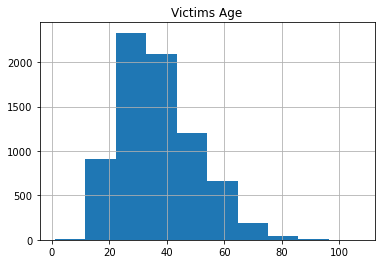

In [125]:
killings.hist("Victims Age")
plt.show()

In [126]:
median_age = round(killings["Victims Age"].median())
killings["Victims Age"] = killings["Victims Age"].fillna(round(median_age))

In [127]:
killings.isnull().sum()

Victims Name                      0
Victims Age                       0
Victims Gender                    0
Victims Race                      0
URL of image of victim            0
Date                              0
Street Address of Incident        0
City                              0
State                             0
Zipcode                          19
County                            0
Agency responsible for death      0
Cause of death                    0
Description of Circumstances      0
Official Disposition of Death     0
Criminal Charges                  0
News Article Link                 0
Symptoms of mental illness?       0
Unarmed                           0
Alleged Weapon                    0
Geography Type                    0
dtype: int64

In [128]:
killings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7661 entries, 0 to 7662
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Victims Name                   7661 non-null   object        
 1   Victims Age                    7661 non-null   float64       
 2   Victims Gender                 7661 non-null   object        
 3   Victims Race                   7661 non-null   object        
 4   URL of image of victim         7661 non-null   object        
 5   Date                           7661 non-null   datetime64[ns]
 6   Street Address of Incident     7661 non-null   object        
 7   City                           7661 non-null   object        
 8   State                          7661 non-null   object        
 9   Zipcode                        7642 non-null   float64       
 10  County                         7661 non-null   object        
 11  Agency responsibl

In [129]:
zipcode_null = killings.loc[killings['Zipcode'].isnull()==True,:].index
killings.drop(zipcode_null,inplace=True)

In [130]:
killings.isnull().sum()

Victims Name                     0
Victims Age                      0
Victims Gender                   0
Victims Race                     0
URL of image of victim           0
Date                             0
Street Address of Incident       0
City                             0
State                            0
Zipcode                          0
County                           0
Agency responsible for death     0
Cause of death                   0
Description of Circumstances     0
Official Disposition of Death    0
Criminal Charges                 0
News Article Link                0
Symptoms of mental illness?      0
Unarmed                          0
Alleged Weapon                   0
Geography Type                   0
dtype: int64

In [131]:
killings['Official Disposition of Death'].value_counts()

Pending investigation                                                             4984
Unreported                                                                        1138
Justified                                                                          653
Unknown                                                                            507
Pending Investigation                                                              125
                                                                                  ... 
Charged, Convicted of 2nd degree manslaughter, Sentenced to 4 years                  1
Pending investigation                                                                1
Justified by internal review                                                         1
Charged with negligent homicide, Acquitted                                           1
No Charges; Civil Suit finds officers were negligent and partially responsible       1
Name: Official Disposition of Death, Length

In [132]:
killings['Official Disposition of Death'].unique()

array(['Pending investigation', 'Justified by Prosecuting Attorney',
       'Criminal', 'Justified by County Prosecutor',
       'Justified by District Attorney', 'Unreported',
       "Justified by State Attorney's Office",
       "Justified by State's Attorney", 'Justified by County Attorney',
       'Justified by outside agency', 'Charged with a crime',
       'Administrative discipline', 'Murder/suicide',
       'Justified by internal review', 'Charged with manslaughter',
       'Justified by Prosecutor', 'Officer indicted/Pending', 'Unknown',
       'Charged with murder', 'Charged with voluntary manslaughter',
       'Charged', 'Charged, Convicted of Third Degree Murder',
       'Charged with involuntary manslaughter',
       'Charged with first-degree murder', 'Charged, Convicted',
       'Accidental', 'Charged with murder, Acquitted',
       'Charged with second-degree murder',
       'Charged with reckless homicide', 'Justified',
       'Charged with manslaughter, acquitted',
  

In [133]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('unjustified'), 'Official Disposition of Death'] = 'Unjustified'

In [134]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('justified'), 'Official Disposition of Death'] = 'Justified'

In [135]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('convicted'), 'Official Disposition of Death'] = 'Convicted'

In [136]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('acquitted'), 'Official Disposition of Death'] = 'Acquitted'

In [137]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('charged'), 'Official Disposition of Death'] = 'Charged'

In [138]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('pending investigation'), 'Official Disposition of Death'] = 'Pending Investigation'

In [139]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('unknown'), 'Official Disposition of Death'] = 'Unknown'

In [140]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('pending investigaton'), 'Official Disposition of Death'] = 'Pending Investigation'

In [141]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('ongoing investigation'), 'Official Disposition of Death'] = 'Under Investigation'

In [142]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('unknown'), 'Official Disposition of Death'] = 'Unknown'

In [143]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('no indictment'), 'Official Disposition of Death'] = 'No indictment'

In [144]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('No charges'), 'Official Disposition of Death'] = 'No charges'

In [145]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('unreported'), 'Official Disposition of Death'] = 'Unreported'

In [146]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('under investigation'), 'Official Disposition of Death'] = 'Under Investigation'

In [147]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('indicted'), 'Official Disposition of Death'] = 'Indicted'

In [148]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('no charges'), 'Official Disposition of Death'] = 'No charges'

In [149]:
killings.loc[killings['Official Disposition of Death'].str.lower().str.contains('no known charges'), 'Official Disposition of Death'] = 'No charges'

In [150]:
killings['Official Disposition of Death'].value_counts()

Pending Investigation            5120
Unreported                       1139
Justified                         687
Unknown                           508
Charged                            51
Murder/suicide                     25
Convicted                          25
Criminal                           22
Under Investigation                17
Grand jury/No bill or Cleared      14
Acquitted                          12
Found Excusable                     6
No charges                          5
Found Not Guilty                    2
Cleared by district attorney        2
No indictment                       2
Indicted                            2
Insufficient Evidence               1
Administrative discipline           1
Accidental                          1
Name: Official Disposition of Death, dtype: int64

In [151]:
killings.head()

,Victims Name,Victims Age,Victims Gender,Victims Race,URL of image of victim,Date,Street Address of Incident,City,State,Zipcode,...,Agency responsible for death,Cause of death,Description of Circumstances,Official Disposition of Death,Criminal Charges,News Article Link,Symptoms of mental illness?,Unarmed,Alleged Weapon,Geography Type
0,Eric M. Tellez,28.0,Male,White,https://fatalencounters.org/wp-content/uploads...,2019-12-31,Broad St.,Globe,AZ,85501.0,...,Globe Police Department,Gunshot,"After midnight, a patrol officer was on routin...",Pending Investigation,No known charges,https://www.azfamily.com/news/phoenix-man-arme...,No,Allegedly Armed,knife,Rural
1,Name withheld by police,34.0,Male,Unknown race,None,2019-12-31,7239-7411 I-40,Memphis,AR,38103.0,...,"Memphis Police Department, Arkansas State Police",Gunshot,"Police began a chase regarding a kidnapping, e...",Pending Investigation,No known charges,https://www.fox16.com/local-news-2/kidnapping-...,No,Unclear,unclear,Urban
2,Terry Hudson,57.0,Male,Black,None,2019-12-31,3600 N 24th St,Omaha,NE,68110.0,...,Omaha Police Department,Gunshot,Police responded to a domestic incident on the...,Pending Investigation,No known charges,https://www.ketv.com/article/omaha-police-offi...,No,Allegedly Armed,gun,Urban
3,Malik Williams,23.0,Male,Black,None,2019-12-31,30800 14th Avenue South,Federal Way,WA,98003.0,...,Federal Way Police Department,Gunshot,Police responded to a domestic dispute. Police...,Pending Investigation,No known charges,https://www.king5.com/article/news/local/2-fed...,No,Allegedly Armed,gun,Suburban
4,Frederick Perkins,37.0,Male,Black,None,2019-12-31,17057 N Outer 40 Rd,Chesterfield,MO,63005.0,...,Chesterfield Police Department,Gunshot,Police went to Chesterfield Outlets about 1 p....,Pending Investigation,No known charges,https://www.stltoday.com/news/local/crime-and-...,No,Vehicle,vehicle,Suburban


In [152]:
killings['Criminal Charges'].value_counts()

No known charges                                                                 7505
Charged with a crime                                                               48
No                                                                                 37
Charged, Acquitted                                                                 17
Charged, Mistrial                                                                   5
Charged, Convicted                                                                  4
Charged, Convicted, Sentenced to 30 years in prison                                 2
Charged, Convicted, Sentenced to 5 years probation.                                 2
Charged, Charges Tossed                                                             2
Charged, Convicted, Sentenced to life in prison                                     2
Charged, Convicted, Sentenced to Life in Prison                                     1
Charged, Convicted, Sentenced to 1 year in jail, 3 yea

In [153]:
killings.loc[killings['Criminal Charges'] == 'No', 'Criminal Charges'] = 'No Charges'
killings.loc[killings['Criminal Charges'] == 'NO', 'Criminal Charges'] = 'No Charges'
killings.loc[killings['Criminal Charges'] == 'No known charges', 'Criminal Charges'] = 'No Charges'

In [154]:
killings['Criminal Charges'].value_counts()

No Charges                                                                       7543
Charged with a crime                                                               48
Charged, Acquitted                                                                 17
Charged, Mistrial                                                                   5
Charged, Convicted                                                                  4
Charged, Charges Tossed                                                             2
Charged, Convicted, Sentenced to life in prison                                     2
Charged, Convicted, Sentenced to 30 years in prison                                 2
Charged, Convicted, Sentenced to 5 years probation.                                 2
Charged, Convicted, Sentenced to 3 months in jail                                   1
Charged, Convicted, Sentenced to 5 years in prison                                  1
Charged, Convicted, Sentenced to 18 months            

In [155]:
convicted = killings[killings['Criminal Charges'].str.lower().str.contains('convicted')]
for i, index in enumerate(convicted.index):
    print()
    print(str(i+1) + '. ' + killings.iloc[index]['Description of Circumstances'])
    print(killings.iloc[index]['News Article Link'])
    print()


1. Deputies shot and killed a carjacking suspect who had his 7-year-old daughter in the vehicle. The vehicle was disabled and in a remote field.
http://kstp.com/news/suspect-dead-child-safe-north-branch-carjacking/4538090/


2. Police went to a Home Depot following a call reporting shots fired. When they got there, they exchanged gunfire with a man, killing him. Details were mostly withheld by police.
http://kxan.com/2017/04/24/suspect-dead-after-exchanging-gunfire-with-officers-at-killeen-marketplace/


3. Deputies responded to a domestic disturbance and decided to call child welfare officials to the scene. According to police, Tarrant then pulled out a gun and pointed it at deputies.
http://www.wsbtv.com/news/news/local/gbi-investigates-deadly-officer-involved-shooting-/npR4n/


4. Deputies arrived at Keeton's house as part of a drug investigation, authorities said. Keeton fired at deputies when they approached and was killed when they returned fire, police said.
http://www.clarionl

In [156]:
import urllib.request

def is_url_working(x):
    #import urllib.request
    print('starting')
    try:
        test_url = urllib.request.urlopen(x)
        return 'Yes'
    except:
        return 'No'
    
# killings['URL working?'] = killings['Link to news article or photo of official document'].apply(is_url_working)

In [157]:
killings.loc[killings["Victims Race"] == 'Unknown race', "Victims Race"] = 'Unknown'
killings.loc[killings["Victims Race"] == 'Unknown Race', "Victims Race"] = 'Unknown'

In [158]:
killings.loc[killings["Victims Race"]=='Asian', "Victims Race"] = 'Asian/Pacific Islander'
killings.loc[killings["Victims Race"]=='Pacific Islander', "Victims Race"] = 'Asian/Pacific Islander'

In [159]:
killings["Victims Race"].value_counts()

White                     3372
Black                     1941
Hispanic                  1332
Unknown                    728
Asian/Pacific Islander     159
Native American            110
Name: Victims Race, dtype: int64

In [160]:
killings['Victims Name'].value_counts()

Name withheld by police    204
Michael Brown                3
Robert Edwards               3
Michael Johnson              2
Darius Smith                 2
                          ... 
Dennis Flowers               1
Nathaniel Richmond           1
Thomas Selje                 1
Tyler D. Whitmire            1
Andrew Layton                1
Name: Victims Name, Length: 7398, dtype: int64

In [161]:
killings[['First Name', 'Last Name']] = killings['Victims Name'].loc[killings['Victims Name'].str.split().str.len() == 2].str.split(expand=True)

killings.loc[killings['Victims Name'].str.split().str.len() != 2, 'First Name'] = killings['Victims Name'].str.split().str[0]
killings.loc[killings['Victims Name'].str.split().str.len() != 2, 'Last Name'] = killings['Victims Name'].apply(lambda x: HumanName(x).last)
# killings.loc[killings['Victims Name'].str.split().str.len() != 2, ['First Name', 'Last Name']] = [killings['Victims Name'].str.split().str[0], killings['Victims Name'].str.split().str[-1]]

killings.loc[killings['Victims Name'] == 'Name withheld by police', ['First Name', 'Last Name']] = ['Unknown', 'Unknown']

killings[['First Name', 'Last Name']]

,First Name,Last Name
0,Eric,Tellez
1,Unknown,Unknown
2,Terry,Hudson
3,Malik,Williams
4,Frederick,Perkins
...,...,...
7658,Mark,Chavez
7659,Tyree,Bell
7660,Christopher,Tavares
7661,Andrew,Closson


In [162]:
killings['First Name'].value_counts()[0:50]

Michael        209
Unknown        206
James          143
John           140
David          132
Robert         130
Christopher    115
William        114
Daniel         103
Jose            84
Anthony         80
Joseph          79
Jason           76
Charles         69
Joshua          67
Richard         65
Thomas          63
Matthew         62
Mark            58
Eric            56
Steven          54
Kenneth         53
Brandon         50
Kevin           46
Andrew          46
Jonathan        44
Jeffrey         43
Juan            43
Brian           43
Timothy         40
Paul            39
Ronald          36
Stephen         36
Jeremy          34
Ryan            34
Luis            33
Scott           32
Justin          32
Nicholas        32
Donald          30
Aaron           29
Gary            29
Carlos          27
Patrick         27
Larry           27
Edward          26
Dennis          26
Jesse           26
Gregory         26
Shawn           25
Name: First Name, dtype: int64

In [163]:
killings['Last Name'].value_counts()[0:60]

Unknown      204
Smith         91
Johnson       77
Brown         58
Williams      54
Jones         48
Davis         39
Hall          34
Rodriguez     33
Martinez      32
Garcia        31
Anderson      30
Hernandez     30
Harris        29
Thomas        29
Martin        27
Robinson      27
Ramirez       26
Clark         25
White         24
Gonzalez      24
Lopez         24
Jackson       23
Thompson      23
Wilson        22
Taylor        22
Miller        22
Allen         19
Torres        18
Walker        17
Sanchez       16
Young         16
Baker         16
King          16
Edwards       16
Flores        16
Scott         16
Rivera        16
Perez         15
Carter        15
Collins       14
Moore         14
Brooks        14
Evans         14
Mitchell      14
Lewis         14
Rogers        14
Lee           13
West          13
Herrera       12
Alvarez       12
Phillips      12
Turner        12
Cruz          12
Robertson     12
Morris        12
Coleman       11
Hill          11
Green         

In [164]:
killings.head()

,Victims Name,Victims Age,Victims Gender,Victims Race,URL of image of victim,Date,Street Address of Incident,City,State,Zipcode,...,Description of Circumstances,Official Disposition of Death,Criminal Charges,News Article Link,Symptoms of mental illness?,Unarmed,Alleged Weapon,Geography Type,First Name,Last Name
0,Eric M. Tellez,28.0,Male,White,https://fatalencounters.org/wp-content/uploads...,2019-12-31,Broad St.,Globe,AZ,85501.0,...,"After midnight, a patrol officer was on routin...",Pending Investigation,No Charges,https://www.azfamily.com/news/phoenix-man-arme...,No,Allegedly Armed,knife,Rural,Eric,Tellez
1,Name withheld by police,34.0,Male,Unknown,None,2019-12-31,7239-7411 I-40,Memphis,AR,38103.0,...,"Police began a chase regarding a kidnapping, e...",Pending Investigation,No Charges,https://www.fox16.com/local-news-2/kidnapping-...,No,Unclear,unclear,Urban,Unknown,Unknown
2,Terry Hudson,57.0,Male,Black,None,2019-12-31,3600 N 24th St,Omaha,NE,68110.0,...,Police responded to a domestic incident on the...,Pending Investigation,No Charges,https://www.ketv.com/article/omaha-police-offi...,No,Allegedly Armed,gun,Urban,Terry,Hudson
3,Malik Williams,23.0,Male,Black,None,2019-12-31,30800 14th Avenue South,Federal Way,WA,98003.0,...,Police responded to a domestic dispute. Police...,Pending Investigation,No Charges,https://www.king5.com/article/news/local/2-fed...,No,Allegedly Armed,gun,Suburban,Malik,Williams
4,Frederick Perkins,37.0,Male,Black,None,2019-12-31,17057 N Outer 40 Rd,Chesterfield,MO,63005.0,...,Police went to Chesterfield Outlets about 1 p....,Pending Investigation,No Charges,https://www.stltoday.com/news/local/crime-and-...,No,Vehicle,vehicle,Suburban,Frederick,Perkins


In [166]:
killings.to_csv('./csv_files/police_killings_clean.csv', index=False)